# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

The format of the college entrance exam SAT, administered by College Board, changed to a new format in 2016. Tracking the nation-wide changes and understanding the factors behind those changes is important to the future of the SAT. In particular, we want to see how participation rates have changed over the past three years since the new format was introduces, and look at the specific states where participation has increased, or where participation could likely be improved.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat17 = pd.read_csv('data/sat_2017.csv')
act17 = pd.read_csv('data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
print(sat17.head(10))
print(act17.head(10))

                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  

In [4]:
print(sat17.shape)
print(act17.shape)

(51, 5)
(52, 7)


In [5]:
print(sat17.isna().sum())
print(act17.isna().sum())

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64
State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64


In [6]:
sat17.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [7]:
act17.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [8]:
sat17.sort_values(by = 'Math').head() #describe() shows at least one impossible value in the Math column, sort_values helps to find the bad data

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060
8,District of Columbia,100%,482,468,950
7,Delaware,100%,503,492,996
12,Idaho,93%,513,493,1005
22,Michigan,100%,509,495,1005


In [9]:
act17.sort_values(by = "Science").head() #describe() shows an unlikely value in the Science column

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6
29,Nevada,100%,16.3,18.0,18.1,18.2,17.8
25,Mississippi,100%,18.2,18.1,18.8,18.8,18.6
41,South Carolina,100%,17.5,18.6,19.1,18.9,18.7
34,North Carolina,100%,17.8,19.3,19.6,19.3,19.1


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: This data lists the average scores on SAT and ACT tests from each state (plus DC). The scores are broken down by section and total/composite scores are also given. The data also lists participation rates for each state.

#### 4a. Does the data look complete? 

Answer: Yes. SAT data has 51 rows for all 50 states and D.C., while the ACT data includes the national average as well for a total of 52 rows. There are no null values in the data.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: The SAT math score column contains a one value that is below the minimum possible score. The ACT Science column lists a score that, while possible, is so far below the other states that it is difficult to believe. Comparison to data sources shows that Maryland's SAT Math score is actually 524, and their ACT Science score is actually 24.3.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [10]:
#code
sat17.loc[sat17['State'] == 'Maryland', 'Math'] = 524
sat17.loc[sat17['State'] == 'Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [11]:
act17.loc[act17['State'] == 'Maryland', 'Science'] = 24.3
act17.loc[act17['State'] == 'Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,24.3,23.6


#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
#code
print(sat17.dtypes)
print(act17.dtypes)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: The ACT Composite scores are stored as strings rather than floats. The last entry includes an 'x' at the end of the number and therefore the column is stored as strings. This is an error that needs to be corrected. Both data sets have their percentages listed as strings ie "32%", which is fine for display but not useful for analysis.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [13]:
#code
def percent_to_float(perc_str):
    return float(perc_str.split('%')[0]) / 100 #grabs the portion of the string that comes before the % sign, converts it to a float, and divides by 100

sat17['Participation'] = sat17['Participation'].apply(percent_to_float)
act17['Participation'] = act17['Participation'].apply(percent_to_float)

- Fix any individual values preventing other columns from being the appropriate type.

In [14]:
def fix_act_comp(comp_str):
    # ''.join(i for i in s if i.isdigit()) REFERENE CODE - found at https://www.tutorialspoint.com/How-to-remove-characters-except-digits-from-string-in-Python
    
    new_str = ''.join(c for c in comp_str if c.isdigit() or c == '.') #only take characters that appear in floats, digits and decimals
    
    return float(new_str)


fix_act_comp('11.1x') #test the function

11.1

In [15]:
#code

act17['Composite'] = act17['Composite'].apply(fix_act_comp) #apply the new function to the composite scores

- Finish your data modifications by making sure the columns are now typed appropriately.

In [16]:
#code
print(act17['Composite'].tail(5))
print(sat17['Participation'].head(5))
print(act17['Participation'].head(5))

47    23.8
48    21.9
49    20.4
50    20.5
51    20.2
Name: Composite, dtype: float64
0    0.05
1    0.38
2    0.30
3    0.03
4    0.53
Name: Participation, dtype: float64
0    0.60
1    1.00
2    0.65
3    0.62
4    1.00
Name: Participation, dtype: float64


- Display the data types again to confirm they are correct.

In [17]:
#Code:
print(sat17.dtypes)
print(act17.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [18]:
#code
# act17.columns = act17.columns.str.lower()
# sat17.rename({'Evidence-Based Reading and Writing' : 'english'}, axis = 1, inplace = True)
# sat17.columns = sat17.columns.str.lower()

In [19]:
columns_sat = ['state', 'participation_sat', 'english_sat', 'math_sat', 'total_sat']
columns_act = ['state', 'participation_act', 'english_act', 'math_act', 'reading', 'science', 'composite_act']

In [20]:
sat17.columns = columns_sat
act17.columns = columns_act

In [21]:
act17.head()

,state,participation_act,english_act,math_act,reading,science,composite_act
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [22]:
sat17.head()

,state,participation_sat,english_sat,math_sat,total_sat
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [23]:
#code
act17.head()

,state,participation_act,english_act,math_act,reading,science,composite_act
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [24]:
act17.drop(0, inplace = True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [25]:
#Code:
combo17 = pd.merge(act17, sat17, how = 'left', left_on = 'state', right_on = 'state')

In [26]:
combo17.head()

,state,participation_act,english_act,math_act,reading,science,composite_act,participation_sat,english_sat,math_sat,total_sat
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [27]:
#Code:
combo17.to_csv('combined_2017.csv')

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [28]:
sat18 = pd.read_csv('data/sat_2018.csv')
act18 = pd.read_csv('data/act_2018.csv')

In [29]:
act18.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [30]:
act18['State'].value_counts()[:5] #check for duplicates

Maine       2
Indiana     1
Vermont     1
Arkansas    1
Maryland    1
Name: State, dtype: int64

In [31]:
act18.loc[act18['State'] == 'Maine'] #act18 has two entries for "Maine"

,State,Participation,Composite
19,Maine,7%,24.0
20,Maine,7%,24.0


In [32]:
act18.drop(19, inplace = True)
act18.loc[act18['State'] == 'Maine']

,State,Participation,Composite
20,Maine,7%,24.0


In [33]:
print(sat18.head())
act18.head()

        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076


,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [34]:
sat18['Participation'] = sat18['Participation'].apply(percent_to_float)
act18['Participation'] = act18['Participation'].apply(percent_to_float)

In [35]:
act18.columns = ['state', 'participation_act', 'composite_act']
sat18.columns = columns_sat

In [36]:
#CORRECT THE FLORIDA 2018 PARTICIPATION DATA:
#Source for correction: https://reports.collegeboard.org/pdf/2018-florida-sat-suite-assessments-annual-report.pdf

sat18.loc[sat18['state'] =='Florida','participation_sat'] = 0.97

In [37]:
combo18 = pd.merge(act18, sat18, how = 'left', suffixes=('_act','_sat'), left_on = 'state', right_on = 'state')

In [38]:
combo18.head()

,state,participation_act,composite_act,participation_sat,english_sat,math_sat,total_sat
0,Alabama,1.00,19.1,0.06,595.0,571.0,1166.0
1,Alaska,0.33,20.8,0.43,562.0,544.0,1106.0
2,Arizona,0.66,19.2,0.29,577.0,572.0,1149.0
3,Arkansas,1.00,19.4,0.05,592.0,576.0,1169.0
4,California,0.27,22.7,0.60,540.0,536.0,1076.0


In [39]:
act19 = pd.read_csv('data/act_2019.csv')
sat19 = pd.read_csv('data/sat_2019.csv')

In [40]:
act19.drop(51, inplace =True) #drop 'National' row

In [41]:
sat19.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [42]:
#sat19[sat19['State'] == 'Alabama']['Participation Rate']
sat19.loc[sat19['State'] == 'Alabama', 'Participation Rate'][0]

'7%'

In [43]:
to_drop = []

# Find the indexes of rows where participation is invalid, then use the indexes to drop the rows

for i, state in enumerate(sat19['State']):
    if sat19[sat19['State'] == state]['Participation Rate'].item() == 'Ñ':
        to_drop.append(i)

sat19.drop(to_drop, inplace = True)

In [44]:
act19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Participation  51 non-null     object 
 2   Composite      51 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


In [45]:
sat19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               51 non-null     object
 1   Participation Rate  51 non-null     object
 2   EBRW                51 non-null     int64 
 3   Math                51 non-null     int64 
 4   Total               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.4+ KB


In [46]:
sat19['Participation Rate'] = sat19['Participation Rate'].apply(percent_to_float)
act19['Participation'] = act19['Participation'].apply(percent_to_float)

In [47]:
act19.columns = ['state', 'participation_act_19', 'composite_act_19']
sat19.columns = ['state', 'participation_sat_19', 'english_sat_19', 'math_sat_19', 'total_sat_19']

In [48]:
combo19 = pd.merge(act19, sat19, how = 'left', left_on = 'state', right_on = 'state')

In [49]:
combo19.head()

,state,participation_act_19,composite_act_19,participation_sat_19,english_sat_19,math_sat_19,total_sat_19
0,Alabama,1.00,18.9,0.07,583,560,1143
1,Alaska,0.38,20.1,0.41,556,541,1097
2,Arizona,0.73,19.0,0.31,569,565,1134
3,Arkansas,1.00,19.3,0.06,582,559,1141
4,California,0.23,22.6,0.63,534,531,1065


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [50]:
combo17_18 = pd.merge(combo17, combo18, how = 'inner', left_on = 'state', right_on = 'state', suffixes = ('_17', '_18'))

In [51]:
final_data = pd.merge(combo17_18, combo19, how = 'inner', left_on = 'state', right_on = 'state')

In [52]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 50 non-null     object 
 1   participation_act_17  50 non-null     float64
 2   english_act           50 non-null     float64
 3   math_act              50 non-null     float64
 4   reading               50 non-null     float64
 5   science               50 non-null     float64
 6   composite_act_17      50 non-null     float64
 7   participation_sat_17  50 non-null     float64
 8   english_sat_17        50 non-null     int64  
 9   math_sat_17           50 non-null     int64  
 10  total_sat_17          50 non-null     int64  
 11  participation_act_18  50 non-null     float64
 12  composite_act_18      50 non-null     float64
 13  participation_sat_18  50 non-null     float64
 14  english_sat_18        50 non-null     float64
 15  math_sat_18           50 

In [53]:
final_data.to_csv('final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [54]:
#Code:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_act_17,50.0,0.6592,0.321107,0.08,0.3100,0.710,1.0000,1.0
english_act,50.0,20.8620,2.324307,16.30,19.0000,20.550,23.1000,25.5
math_act,50.0,21.1360,1.973990,18.00,19.4000,20.900,23.0000,25.3
reading,50.0,21.9560,2.046317,18.10,20.4250,21.700,23.8750,26.0
science,50.0,21.4320,1.761891,18.20,19.9250,21.300,22.9750,24.9
composite_act_17,50.0,21.4660,2.004241,17.80,19.8000,21.400,23.4000,25.5
participation_sat_17,50.0,0.3860,0.345602,0.02,0.0400,0.340,0.6500,1.0
english_sat_17,50.0,570.8600,44.385146,503.00,535.2500,559.500,613.5000,644.0
math_sat_17,50.0,558.6600,45.839832,492.00,524.0000,549.500,601.0000,651.0
total_sat_17,50.0,1129.6200,89.913085,996.00,1057.0000,1107.500,1214.0000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [55]:
#code

def calc_std(col):
    summation = 0
    n = len(col)
    mu = np.mean(col)
    for x in col:
        summation += (x - mu) ** 2
    sigma = np.sqrt(summation / n)
    return sigma

In [56]:
calc_std(final_data['participation_act_17'][1:])

0.31731826105741184

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [57]:
np.mean(combo17_18.drop('state', axis = 1)['participation_act_17'])

0.6591999999999999

In [58]:
 for col in final_data.drop('state', axis =1).columns:
        print(calc_std(final_data[col]))

0.3178794740149165
2.3009467616613812
1.9541504548012678
2.025750231395766
1.744183476587254
1.9840977798485642
0.3421286307808805
43.9390532442382
45.37911854586864
89.00941298536914
0.33771254048376703
2.090091864009809
0.3741644558212338
46.537937212558106
46.51518461749884
91.91248881408882
0.3430510166141473
2.175183670405789
0.38212228409240934
45.28295043391055
50.24331199274188
95.17612305615312


In [59]:
#Code:

sd = {col : calc_std(final_data[col]) for col in final_data.drop('state', axis = 1)}
sd

{'participation_act_17': 0.3178794740149165,
 'english_act': 2.3009467616613812,
 'math_act': 1.9541504548012678,
 'reading': 2.025750231395766,
 'science': 1.744183476587254,
 'composite_act_17': 1.9840977798485642,
 'participation_sat_17': 0.3421286307808805,
 'english_sat_17': 43.9390532442382,
 'math_sat_17': 45.37911854586864,
 'total_sat_17': 89.00941298536914,
 'participation_act_18': 0.33771254048376703,
 'composite_act_18': 2.090091864009809,
 'participation_sat_18': 0.3741644558212338,
 'english_sat_18': 46.537937212558106,
 'math_sat_18': 46.51518461749884,
 'total_sat_18': 91.91248881408882,
 'participation_act_19': 0.3430510166141473,
 'composite_act_19': 2.175183670405789,
 'participation_sat_19': 0.38212228409240934,
 'english_sat_19': 45.28295043391055,
 'math_sat_19': 50.24331199274188,
 'total_sat_19': 95.17612305615312}

In [60]:
final_data.std().T

participation_act_17     0.321107
english_act              2.324307
math_act                 1.973990
reading                  2.046317
science                  1.761891
composite_act_17         2.004241
participation_sat_17     0.345602
english_sat_17          44.385146
math_sat_17             45.839832
total_sat_17            89.913085
participation_act_18     0.341141
composite_act_18         2.111312
participation_sat_18     0.377963
english_sat_18          47.010416
math_sat_18             46.987432
total_sat_18            92.845634
participation_act_19     0.346534
composite_act_19         2.197267
participation_sat_19     0.386002
english_sat_19          45.742688
math_sat_19             50.753409
total_sat_19            96.142403
dtype: float64

In [61]:
{col : np.std(final_data[col]) for col in final_data.drop('state', axis = 1)}

{'participation_act_17': 0.3178794740149165,
 'english_act': 2.3009467616613812,
 'math_act': 1.9541504548012678,
 'reading': 2.025750231395766,
 'science': 1.744183476587254,
 'composite_act_17': 1.9840977798485642,
 'participation_sat_17': 0.3421286307808805,
 'english_sat_17': 43.9390532442382,
 'math_sat_17': 45.37911854586864,
 'total_sat_17': 89.00941298536914,
 'participation_act_18': 0.33771254048376703,
 'composite_act_18': 2.090091864009809,
 'participation_sat_18': 0.3741644558212338,
 'english_sat_18': 46.537937212558106,
 'math_sat_18': 46.51518461749884,
 'total_sat_18': 91.91248881408882,
 'participation_act_19': 0.3430510166141473,
 'composite_act_19': 2.175183670405789,
 'participation_sat_19': 0.38212228409240934,
 'english_sat_19': 45.28295043391055,
 'math_sat_19': 50.24331199274188,
 'total_sat_19': 95.17612305615312}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: The manually calculated values differ slighty from pandas describe method. The values match the outputs from numpy std method exactly.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [62]:
mean2019 = final_data[['total_sat_19', 'composite_act_19', 'participation_sat_19', 'participation_act_19']].mean()
mean2019

total_sat_19            1115.8400
composite_act_19          21.4240
participation_sat_19       0.4816
participation_act_19       0.5920
dtype: float64

In [63]:
#code
sat_high_scores_and_part = final_data[(final_data['total_sat_19'] > 1116) & (final_data['participation_sat_19'] > 0.48)][['state', 'total_sat_19', 'participation_sat_19']]
act_high_scores_and_part = final_data[(final_data['composite_act_19'] > 21.4) & (final_data['participation_act_19'] > 0.59)][['state', 'composite_act_19', 'participation_act_19']]

In [64]:
sat_high_scores_and_part

,state,total_sat_19,participation_sat_19
20,Massachusetts,1120,0.81
45,Virginia,1119,0.68


In [65]:
act_high_scores_and_part

,state,composite_act_19,participation_act_19
14,Iowa,21.6,0.66
40,South Dakota,21.6,0.75


---------
## States with high scores and participation rates:

Virginia and especially Massachusetts stand out as a states with above-average participation and total scores in the SAT. Similarly, South Dakota and Iowa stands out for their scores and participation in the ACT. There are no states that appear on both lists.

---------

In [66]:
low_participation = final_data[(final_data['participation_act_19'] < 0.6) & (final_data['participation_sat_19'] < 0.6)][['state', 'participation_sat_19', 'participation_act_19',
                                                                                                                        'composite_act_19', 'total_sat_19']]

In [67]:
low_participation

,state,participation_sat_19,participation_act_19,composite_act_19,total_sat_19
1,Alaska,0.41,0.38,20.1,1097
36,Oregon,0.51,0.42,21.1,1112


-----------
### States with low participation

Alaska and Oregon are the only states which had participation rates below 60% for both tests. Although Oregon had slightly above-average participation in the SAT, Alaska was the only sate with below-average participation in both tests in 2019. Unlike many states with below-average participation rates, Alaska students scored below average in both SAT and ACT. Oregon also had below average scores in both tests, though both scores are very close to average

-----------

In [68]:
low_p_states = final_data[(final_data['participation_act_19'] < .9) & (final_data['participation_sat_19'] < 0.55)][['state', 'participation_act_19', 'participation_sat_19']]
low_p_states

,state,participation_act_19,participation_sat_19
1,Alaska,0.38,0.41
2,Arizona,0.73,0.31
10,Hawaii,0.80,0.54
14,Iowa,0.66,0.03
15,Kansas,0.72,0.04
24,Missouri,0.82,0.04
30,New Mexico,0.63,0.18
36,Oregon,0.42,0.51
40,South Dakota,0.75,0.03


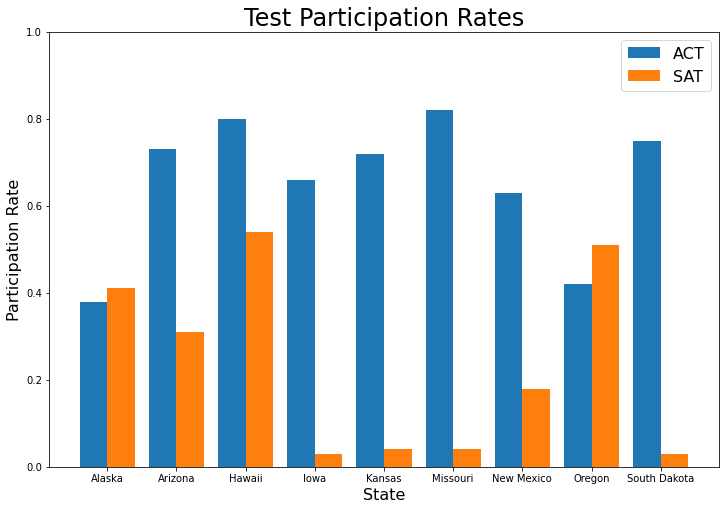

In [69]:
plt.figure(figsize=(12,8))
plt.bar(np.array(range(len(low_p_states)))-.2, low_p_states['participation_act_19'], width = 0.4)
plt.bar(np.array(range(len(low_p_states)))+.2, low_p_states['participation_sat_19'], width = 0.4)
plt.xticks(ticks = list(range(len(low_p_states))), labels = low_p_states['state'])
plt.legend(['ACT', 'SAT'], fontsize = 16)
plt.title('Test Participation Rates', fontsize = 24)
plt.xlabel('State', fontsize = 16)
plt.ylabel('Participation Rate', fontsize = 16)
plt.ylim(0,1)
plt.show()

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [70]:
import seaborn as sns

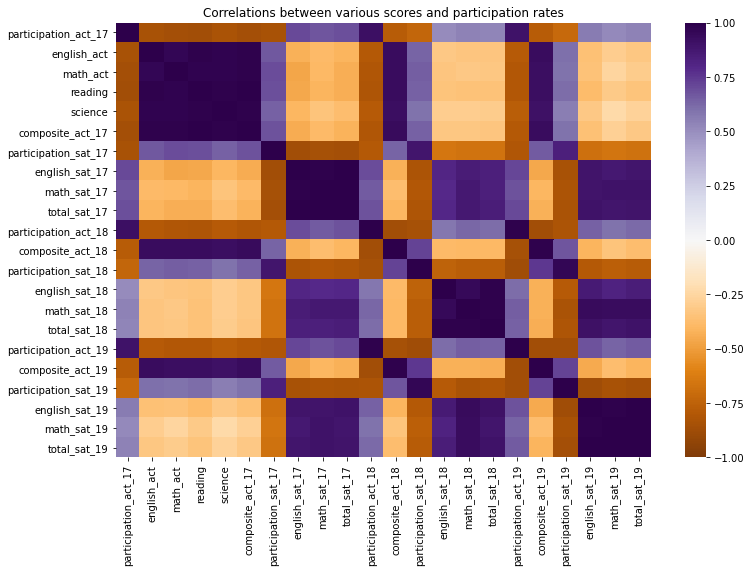

In [71]:
plt.figure(figsize = (12,8))
sns.heatmap(final_data.corr(), cmap = 'PuOr', vmin = -1, vmax = 1)

plt.title('Correlations between various scores and participation rates')

plt.show()

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [72]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, color = 'teal'):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (10,5 * nrows), tight_layout = True) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        #plt.figure(figsize = (10,8))
        ax[i].hist(dataframe[column], color = color) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('Number of States')
        
    if len(list_of_columns) % 2 == 1 :
        ax[-1].remove()

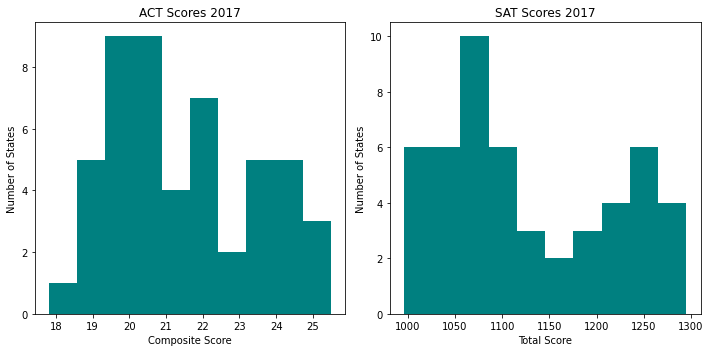

In [73]:
subplot_histograms(final_data, ['composite_act_17', 'total_sat_17'],
                   ['ACT Scores 2017', 'SAT Scores 2017'],
                   ['Composite Score','Total Score'])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

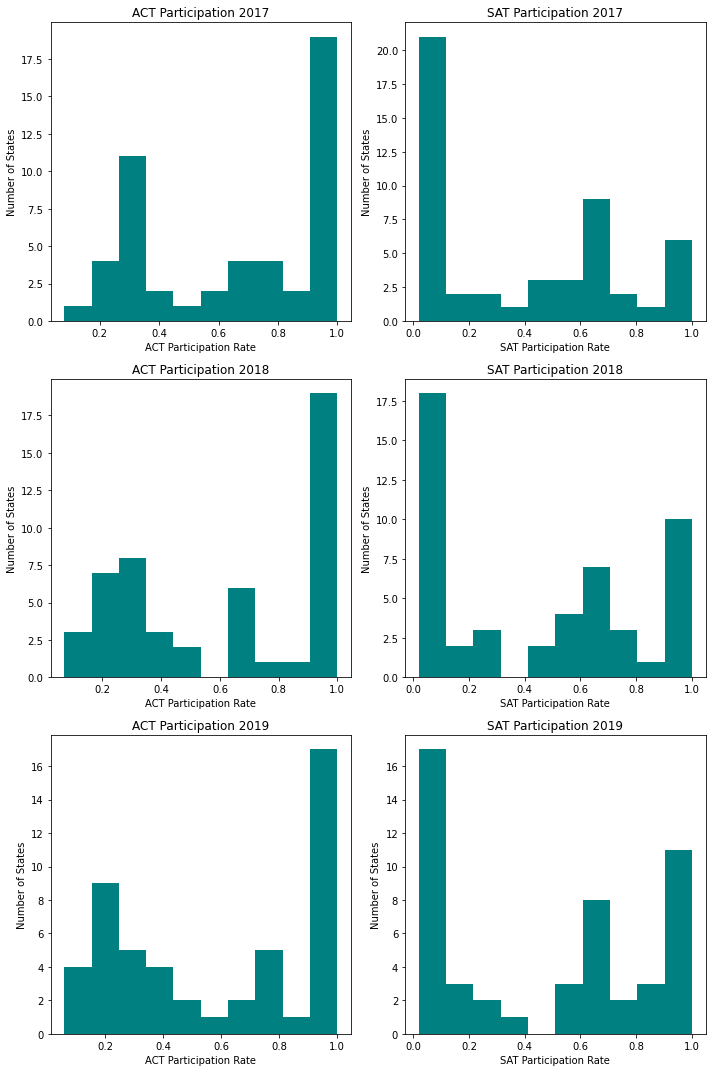

In [74]:
# Code
subplot_histograms(final_data, ['participation_act_17', 'participation_sat_17', 'participation_act_18', 'participation_sat_18', 'participation_act_19', 'participation_sat_19'], 
                   ['ACT Participation 2017', 'SAT Participation 2017', 'ACT Participation 2018', 'SAT Participation 2018', 'ACT Participation 2019', 'SAT Participation 2019'],
                   ['ACT Participation Rate', 'SAT Participation Rate', 'ACT Participation Rate', 'SAT Participation Rate', 'ACT Participation Rate', 'SAT Participation Rate'])

States tend to fall into two categories: high participation rates, and low participation rates. Over the past 3 years, more states have high participation rates in the SAT, and fewer states have very low participation rates. There are more states with very high participation rates in the ACT than there are states with high participation rates in the SAT.

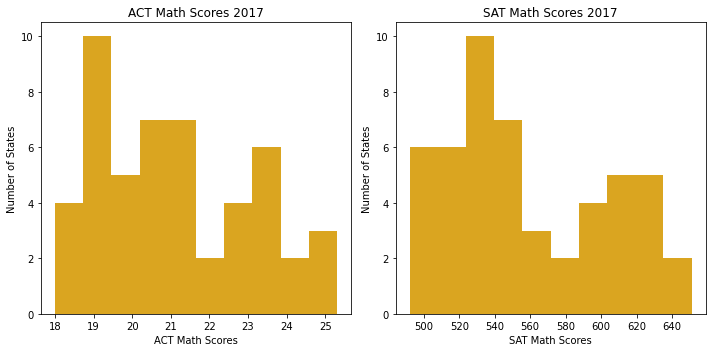

In [75]:
subplot_histograms(final_data, ['math_act', 'math_sat_17'],
                   ['ACT Math Scores 2017', 'SAT Math Scores 2017'],
                   ['ACT Math Scores', 'SAT Math Scores'],
                    color = 'Goldenrod')

Again, there are two primary groupings of states: Those with high scores, and those with low scores. Other analysis, such as scatter plots, show that states with low participation have much higher scores. Thus the groupings of higher scores are the states with low participation.

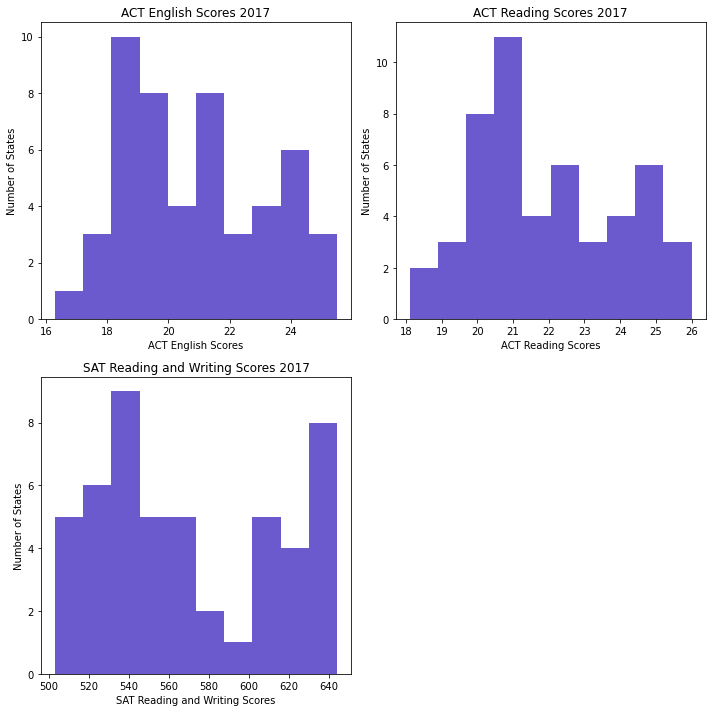

In [76]:
subplot_histograms(final_data, ['english_act', 'reading', 'english_sat_17'],
                   ['ACT English Scores 2017', 'ACT Reading Scores 2017', 'SAT Reading and Writing Scores 2017'],
                   ['ACT English Scores', 'ACT Reading Scores', 'SAT Reading and Writing Scores'],
                   color = 'slateblue')

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [77]:
# Code

def plot_scatter(x, y, xlab, ylab, title, c = 'coral', m = 'D', show = True):
    plt.figure(figsize = (10,7))
    plt.scatter(x,y, color = c, marker = m)
    plt.title(title, fontsize = 24)
    plt.xlabel(xlab, fontsize = 16)
    plt.ylabel(ylab, fontsize = 16)
    plt.grid(True, ls = '--', alpha = 0.4)
    if show:
        plt.show()

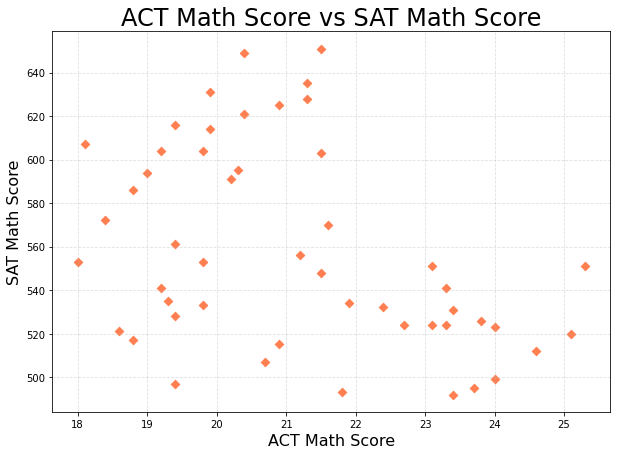

In [78]:
plot_scatter(combo17_18['math_act'], combo17_18['math_sat_17'], 'ACT Math Score','SAT Math Score', 'ACT Math Score vs SAT Math Score')

Higher ACT scores typically correlate to lower SAT scores, though low ACT scores do not necessarily correlate to higher SAT scores.

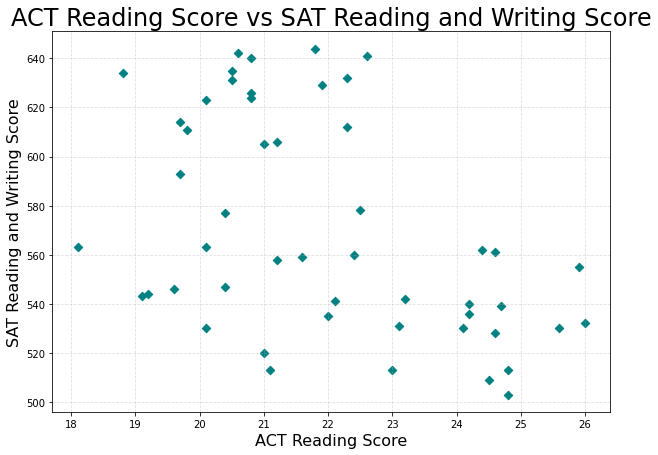

In [79]:
plot_scatter(combo17_18['reading'], combo17_18['english_sat_17'], 'ACT Reading Score', 'SAT Reading and Writing Score',
             'ACT Reading Score vs SAT Reading and Writing Score', c = 'teal')

Compoarison of reading scores is similar to the comparison of math scores

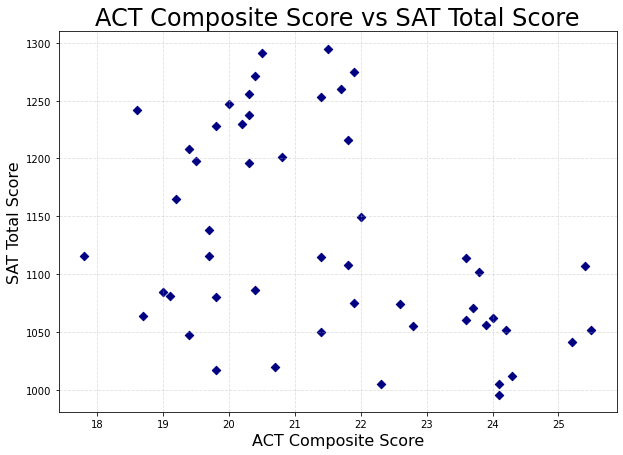

In [80]:
plot_scatter(combo17_18['composite_act_17'], combo17_18['total_sat_17'], 'ACT Composite Score', 'SAT Total Score',
             'ACT Composite Score vs SAT Total Score', c = 'navy')

The total/composite scores continue the relationships in the math and reading scores.

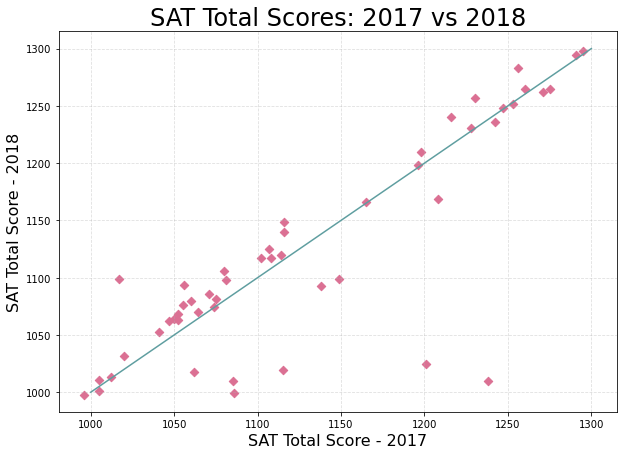

In [81]:
plot_scatter(combo17_18['total_sat_17'], combo17_18['total_sat_18'], 'SAT Total Score - 2017', 'SAT Total Score - 2018',
             'SAT Total Scores: 2017 vs 2018', c = 'palevioletred', show = False)
plt.plot([1000,1300],[1000,1300], c = 'cadetblue') # add a line to better differentiate which points show an increase in scores, and which show a decrease
plt.show()

This is a fairly linear graph. This indicates that states' scores are fairly consistent from one year to the next. There are some outliers whose scores dropped drastically between 2017 and 2018. Plotting a straight line along y = x, states above this line increased their average score from 2017 to 2018, while those below the line saw a decrease in scores.

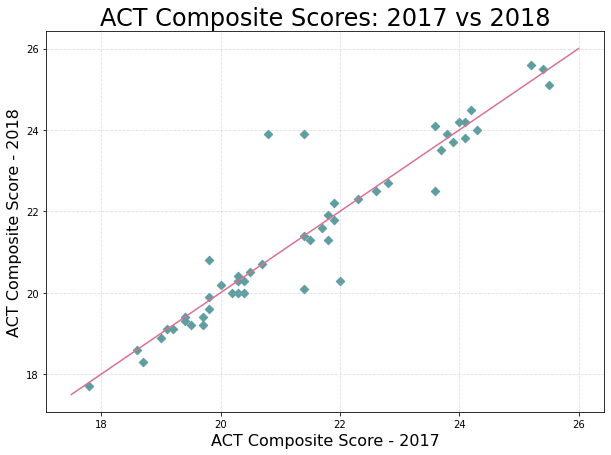

In [82]:
plot_scatter(combo17_18['composite_act_17'], combo17_18['composite_act_18'], 'ACT Composite Score - 2017', 'ACT Composite Score - 2018',
             'ACT Composite Scores: 2017 vs 2018', c = 'cadetblue', show = False)
plt.plot([17.5,26],[17.5,26], c = 'palevioletred') # add a line to better differentiate which points show an increase in scores, and which show a decrease
plt.show()

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [83]:
def plot_boxes(df, column_list, label_list, title, xlab, ylab):
    plt.figure(figsize = (10,6))
    sns.boxplot(data = df[column_list]).set_xticklabels(label_list)
    plt.title(title, fontsize = 24)
    plt.xlabel(xlab, fontsize = 16)
    plt.ylabel(ylab, fontsize = 16)
    plt.show()

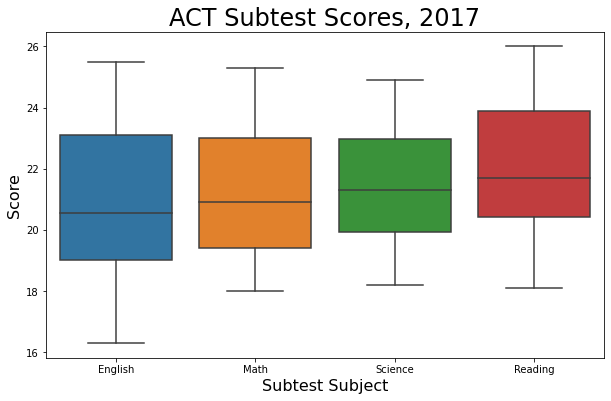

In [84]:
plot_boxes(final_data, column_list = ['english_act', 'math_act', 'science', 'reading'], label_list = ['English', 'Math', 'Science', 'Reading'],
           title = "ACT Subtest Scores, 2017", xlab = 'Subtest Subject', ylab ='Score')

In 2017, ACT reading scores were the highest of any subject. English scores were, on average, the lowest score per state, while those scores had the widest range. Science scores were most consistent across the states.

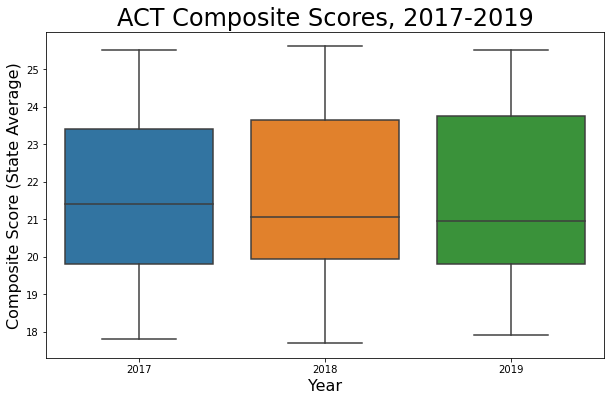

In [85]:
plot_boxes(final_data, column_list= ['composite_act_17', 'composite_act_18', 'composite_act_19'], label_list= ['2017', '2018', '2019'],
           title = "ACT Composite Scores, 2017-2019", xlab = "Year", ylab = "Composite Score (State Average)")

ACT mean scores decresed, while 3rd quartile scores increased. The overall range of scores remained fairly constant.

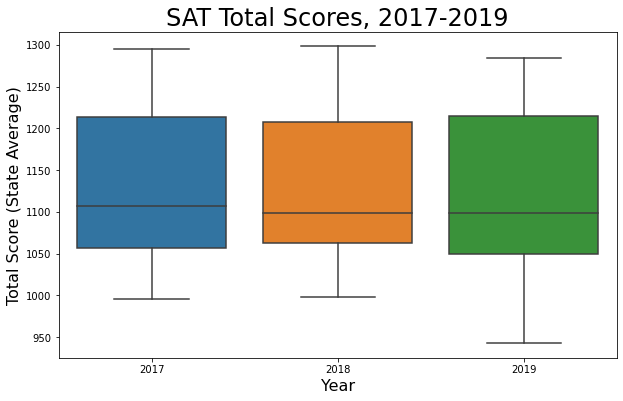

In [86]:
plot_boxes(final_data, column_list= ['total_sat_17', 'total_sat_18', 'total_sat_19'], label_list= ['2017', '2018', '2019'],
           title = "SAT Total Scores, 2017-2019", xlab = "Year", ylab = "Total Score (State Average)")

SAT mean scores also decreased slightly, while 1st and 3rd quartiles scores remain similar. 2019 saw a large increase in the range of scores.

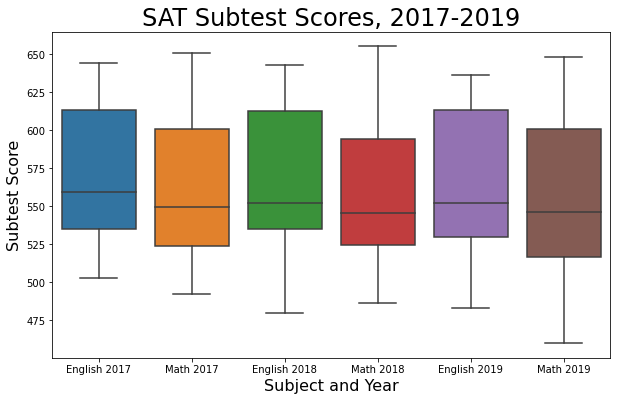

In [87]:
plot_boxes(final_data, column_list= ['english_sat_17', 'math_sat_17', 'english_sat_18', 'math_sat_18', 'english_sat_19', 'math_sat_19'],
           label_list= ['English 2017', 'Math 2017', 'English 2018', 'Math 2018', 'English 2019', 'Math 2019'],
           title = 'SAT Subtest Scores, 2017-2019', xlab = "Subject and Year", ylab = "Subtest Score")

Each year, English scores, both average and quartile, were higher than Math scores.

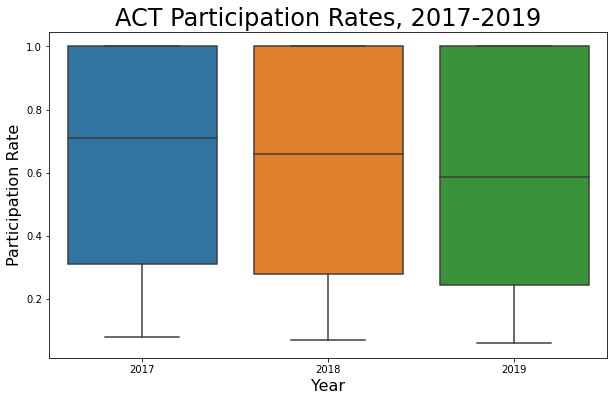

In [88]:
plot_boxes(final_data, column_list= ['participation_act_17', 'participation_act_18', 'participation_act_19'], label_list= ['2017', '2018', '2019'],
           title = "ACT Participation Rates, 2017-2019", xlab = "Year", ylab = "Participation Rate")

ACT Participation rates declined over the three years in this data.

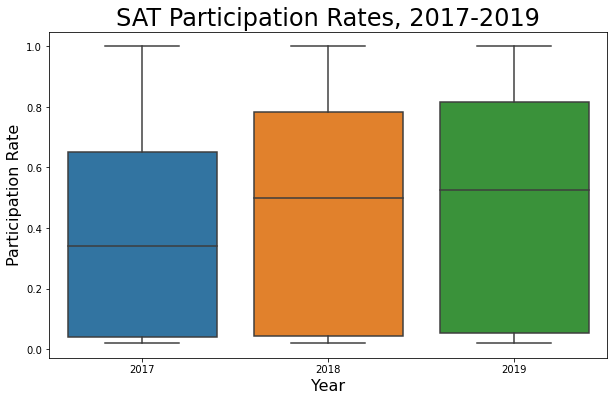

In [89]:
plot_boxes(final_data, column_list= ['participation_sat_17', 'participation_sat_18', 'participation_sat_19'], label_list= ['2017', '2018', '2019'],
           title = "SAT Participation Rates, 2017-2019", xlab = "Year", ylab = "Participation Rate")

SAT participation rates climbed over the three years in the data.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

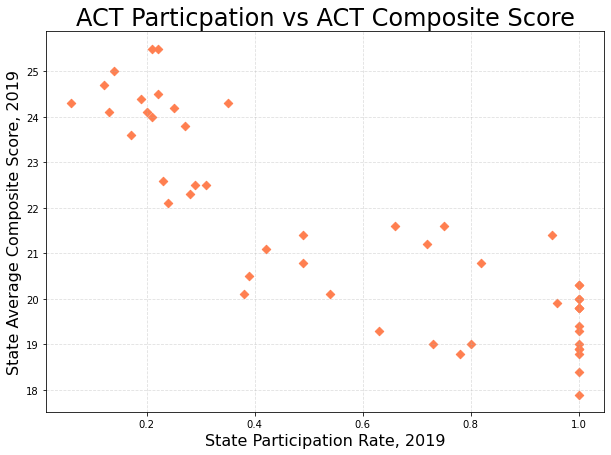

In [90]:
plot_scatter(final_data['participation_act_19'], final_data['composite_act_19'], title = "ACT Particpation vs ACT Composite Score",
             xlab = "State Participation Rate, 2019", ylab = "State Average Composite Score, 2019")

This graph shows that as participation rate increases, total score decreases. States with average scores above 22.0 had participation below 40%.

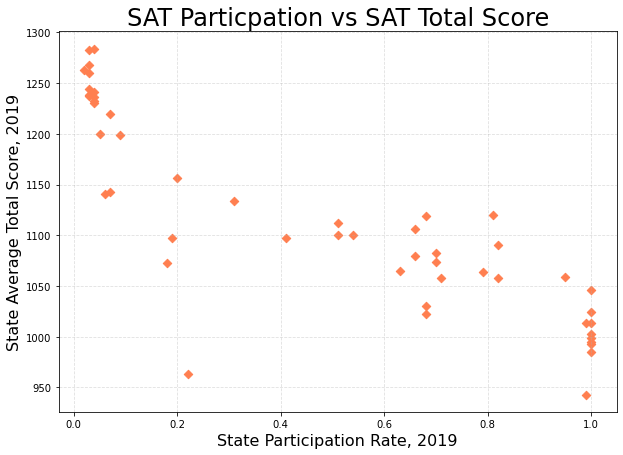

In [91]:
plot_scatter(final_data['participation_sat_19'], final_data['total_sat_19'], title = "SAT Particpation vs SAT Total Score",
             xlab = "State Participation Rate, 2019", ylab = "State Average Total Score, 2019")

Similar to ACT scores, SAT scores decrease with participation rates. The states with average scores near or above 1200 had participation rates well below 20%. When the test is taken by few students, those students are likely to be the most studious and motivated students.

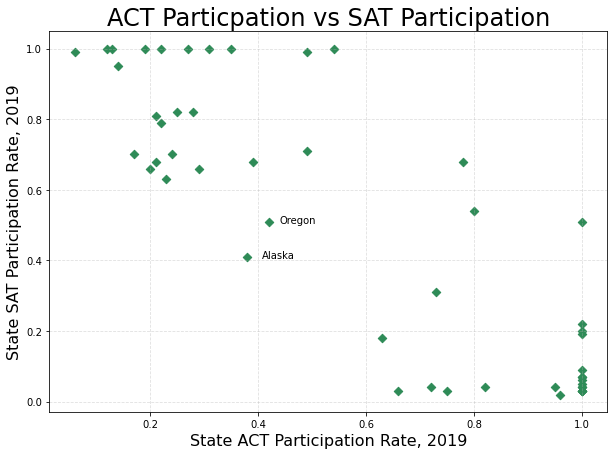

In [92]:
plot_scatter(final_data['participation_act_19'], final_data['participation_sat_19'], title = "ACT Particpation vs SAT Participation",
             xlab = "State ACT Participation Rate, 2019", ylab = "State SAT Participation Rate, 2019", c = 'seagreen', show = False)
plt.figtext(x = .445, y = .5, s = 'Oregon')
plt.figtext(x = .42, y = .43, s = 'Alaska')
plt.show()

States with high ACT participation typically had lower SAT participation and vice-versa. Two states had below 60% participation in both tests.

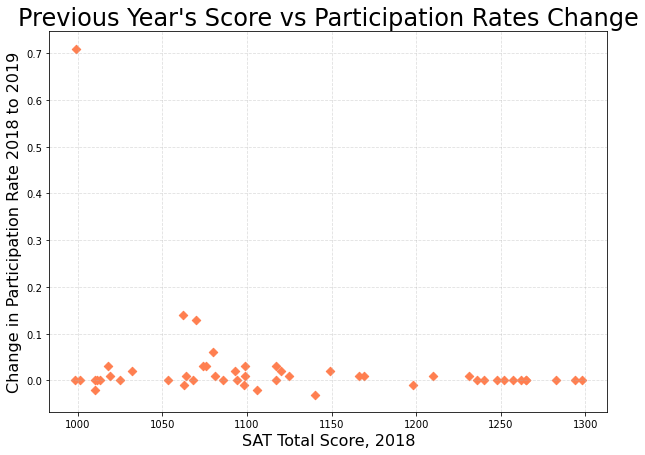

In [93]:
plot_scatter(final_data['total_sat_18'], final_data['participation_sat_19'] - final_data['participation_sat_18'],
             title = 'Previous Year\'s Score vs Participation Rates Change',
             xlab = "SAT Total Score, 2018", ylab = "Change in Participation Rate 2018 to 2019")

Exploring: Does the data suggest that low scores depress participation the next year? Apparently, that is not the case. Wether participation increases or decreases does not seem to depend on the average score from the previous year.

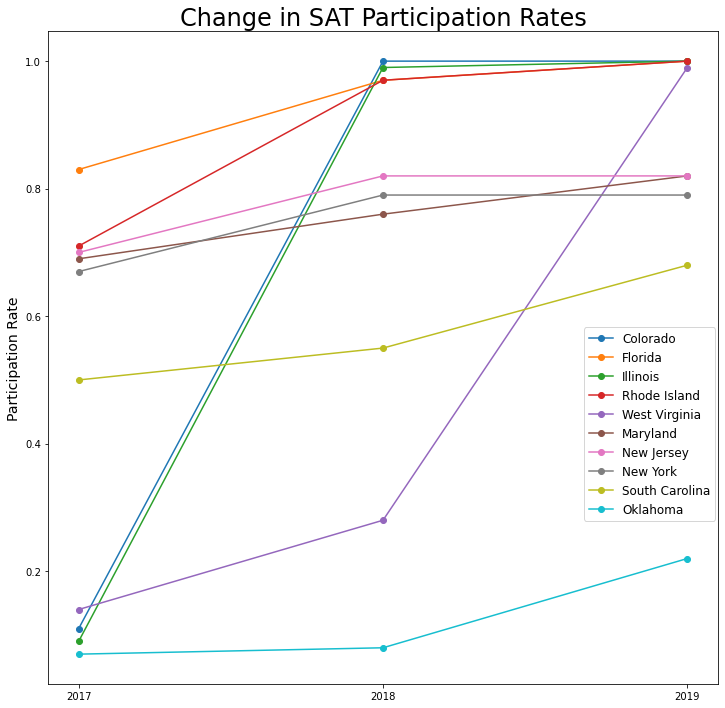

In [94]:
part_data = final_data[['state','participation_sat_17', 'participation_sat_18', 'participation_sat_19']]

part_data = part_data.loc[part_data['participation_sat_19']-part_data['participation_sat_17'] > 0.1] #filter out states that don't change much

plt.figure(figsize = (12,12))
plt.plot([2017, 2018, 2019], part_data[['participation_sat_17', 'participation_sat_18', 'participation_sat_19']].sort_values(by = 'participation_sat_19', ascending = False).T,
        marker = 'o')

label_states = part_data.sort_values(by = 'participation_sat_19', ascending = False)['state'].values
plt.legend(label_states, loc = (0.8,0.25),fontsize = 12)

plt.title("Change in SAT Participation Rates", fontsize = 24)
plt.xticks([2017, 2018, 2019])
#plt.xlabel("Year", fontsize = 14)
plt.ylabel("Participation Rate", fontsize = 14)

plt.show()

A simple plot focusing on the states that have increased their participation rate the most in the past 3 years. Some states have chosen to require all students to take the SAT. Others may provide free testing during school hours, or require that one of either college entry test be taken.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Oregon: Oregon has relatively low participation in both ACT and SAT. This may be because several Oregon universities do not require these tests, or offer alternatives for entry requirements. https://www.oregonlive.com/education/2016/03/willamette_university_wont_req.html This is likely to continue as more universities have since dropped test requirements, in part due to COVID-19.

West Virginia: West Virginia went from a low SAT participation to a very high SAT participation. In 2016, the state decided to make the SAT a requirement for all high school students, replacing a different test to evaluate students. https://www.wvgazettemail.com/news/education/wv-chooses-sat-as-new-high-school-standardized-test-for-juniors/article_b60d2618-4943-56f6-b180-4b4442172ef8.html

South Carolina: Participation rates rose rapidly in South Carolina, without mandating that every student take the test. Rather, SC changed their policy requiring every student to take the ACT. Now every student has the option of taking either the ACT or SAT, but they still must take one test. https://www.postandcourier.com/news/after-technical-glitch-south-carolina-students-can-choose-act-or-sat-next-year/article_21624db0-632d-11e7-b959-67dcd7e841fc.html

FLorida: Even before requiring SAT testing as a graduation requirement, many schools in Florida offered free SAT testing during school hours. Thus, their participation rates went from relatively high to near-100% over the three years in this data. https://www.orlandosentinel.com/news/education/os-ne-sat-scores-florida-20190924-2ycpuogc2ndkrkwzdrkrjgrg64-story.html

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

What we find is that growth in SAT participation is driven largely by State testing requirements. Some states require students to take the SAT in order to graduate high school, other require either the SAT or ACT. Both options increase participation. Participation is lowest in states that require students to take the ACT, but SAT is not an option.

One state that has room for growth in its participation rate is Iowa. There are many students here who are not taking either test. Encouraging the state to adopt a requirement for testing could increase participation drastically, as seen in Colorodo, Illinois, or South Carolina. Other measures to encourage participation could include free testing during school hours, as Florida had done prior to mandating that students take th test. Florida saw above-average participation rates even before the change to mandatory testing.

If it is possible, data indicating overall participation in *either* test would help see which states have truly low participation rates, and thus are good targets for future growth.

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [95]:
# Code:

In [100]:
for col in final_data.columns.values:
    print(f'**{col}**|*float*|ACT 2017|Description|')

**state**|*float*|ACT 2017|Description|
**participation_act_17**|*float*|ACT 2017|Description|
**english_act**|*float*|ACT 2017|Description|
**math_act**|*float*|ACT 2017|Description|
**reading**|*float*|ACT 2017|Description|
**science**|*float*|ACT 2017|Description|
**composite_act_17**|*float*|ACT 2017|Description|
**participation_sat_17**|*float*|ACT 2017|Description|
**english_sat_17**|*float*|ACT 2017|Description|
**math_sat_17**|*float*|ACT 2017|Description|
**total_sat_17**|*float*|ACT 2017|Description|
**participation_act_18**|*float*|ACT 2017|Description|
**composite_act_18**|*float*|ACT 2017|Description|
**participation_sat_18**|*float*|ACT 2017|Description|
**english_sat_18**|*float*|ACT 2017|Description|
**math_sat_18**|*float*|ACT 2017|Description|
**total_sat_18**|*float*|ACT 2017|Description|
**participation_act_19**|*float*|ACT 2017|Description|
**composite_act_19**|*float*|ACT 2017|Description|
**participation_sat_19**|*float*|ACT 2017|Description|
**english_sat_19**|*